## Load Test Data

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Get the file
downloaded = drive.CreateFile({'id':'1ogfj2zpzP_kxkJDCbctDHHzVICDtbUiM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data_.zip')

## Zip File Extraction

In [0]:
import zipfile
import os, os.path

In [0]:
DataPath = './data'

In [0]:
objZip = zipfile.ZipFile('./data_.zip')
objZip.extractall(DataPath)

In [0]:
from IPython.display import Image

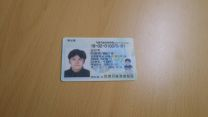

In [7]:
Image('./data/AutoCrop/Origin_irfanview/20180711_134445.jpg')

## Install Pytorch 4.0

In [1]:
# torch 0.4 install for torch.no_grad()
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

# !pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
# !pip3 install torchvision

0.4.0
True


## Region Data Load using pandas


In [0]:
data_root = "./data/AutoCrop/"

In [0]:
import pandas as pd

In [0]:
train_data = pd.read_csv(data_root + 'Train.txt', sep="\t", header=None)

In [0]:
train_data.columns = ["filename", "LTx", "LTy", "RTx", "RTy","RBx", "RBy", "LBx", "LBy"]

In [5]:
train_data.head()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
0,/Origin_irfanview180/20180711_134450_180.jpg,1532,500,2965,931,2675,1753,1352,1332
1,/Origin_irfanview180/20180711_134459_180.jpg,1422,891,2013,320,2935,1412,2274,1903
2,/Origin_irfanview180/20180711_134502_180.jpg,1643,571,2424,400,2605,1833,1803,1873
3,/Origin_irfanview180/20180711_134512_180.jpg,761,1252,1843,400,2404,1092,1262,1983
4,/Origin_irfanview180/20180711_134517_180.jpg,621,1142,1973,621,2334,1472,931,2043


In [6]:
train_data.tail()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
445,/Origin_irfanview/20180712_100825.jpg,601,300,3286,210,3376,2003,410,1953
446,/Origin_irfanview/20180712_100833.jpg,521,230,3506,70,3737,2013,390,2124
447,/Origin_irfanview/20180712_100836.jpg,611,270,3466,-10,3777,1813,581,2094
448,/Origin_irfanview/20180712_100842.jpg,561,170,3486,120,3617,2043,350,1983
449,/Origin_irfanview/20180712_100849.jpg,500,120,3446,70,3647,2013,150,1953


In [0]:
valid_data = pd.read_csv(data_root + 'Valid.txt', sep="\t", header=None)

In [0]:
valid_data.columns = ["filename", "LTx", "LTy", "RTx", "RTy","RBx", "RBy", "LBx", "LBy"]

In [9]:
valid_data.head()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
0,/Origin_irfanview180/20180711_134445_180.jpg,1392,731,2905,701,2875,1583,1482,1583
1,/Origin_irfanview180/20180711_134526_180.jpg,1312,190,2865,911,2434,1913,811,1162
2,/Origin_irfanview180/20180711_134530_180.jpg,1052,791,2043,390,2715,1903,1753,2394
3,/Origin_irfanview180/20180711_134615_180.jpg,1402,410,2474,120,2885,2003,1803,2124
4,/Origin_irfanview180/20180711_134648_180.jpg,1292,280,2434,0,2795,2033,1623,2124


In [10]:
valid_data.tail()

,filename,LTx,LTy,RTx,RTy,RBx,RBy,LBx,LBy
195,/Origin_irfanview/20180712_100732.jpg,661,641,2925,200,3556,1312,701,1963
196,/Origin_irfanview/20180712_100805.jpg,931,591,3096,130,3476,1472,1072,1933
197,/Origin_irfanview/20180712_100821.jpg,781,651,2855,90,3346,1312,1011,1973
198,/Origin_irfanview/20180712_100828.jpg,631,140,3697,90,3837,2124,440,2064
199,/Origin_irfanview/20180712_100846.jpg,591,150,3406,150,3586,1943,290,1883


## Image Load using PILOW

In [0]:
from PIL import Image

def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')


def accimage_loader(path):
    import accimage
    try:
        return accimage.Image(path)
    except IOError:
        # Potentially a decoding problem, fall back to PIL.Image
        return pil_loader(path)


def default_loader(path):
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader(path)
    else:
        return pil_loader(path)

In [0]:
image = default_loader(data_root+train_data['filename'][0])

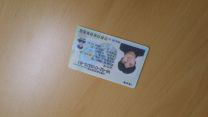

In [13]:
image

## PreProcess Image Data

In [0]:
import numpy as np
import torch

import collections

try:
    import accimage
except ImportError:
    accimage = None
    
def _is_pil_image(img):
    if accimage is not None:
        return isinstance(img, (Image.Image, accimage.Image))
    else:
        return isinstance(img, Image.Image)


def _is_tensor_image(img):
    return torch.is_tensor(img) and img.ndimension() == 3


def _is_numpy_image(img):
    return isinstance(img, np.ndarray) and (img.ndim in {2, 3})

def to_tensor(pic):
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    See ``ToTensor`` for more details.
    Args:
        pic (PIL Image or numpy.ndarray): Image to be converted to tensor.
    Returns:
        Tensor: Converted image.
    """
    if not(_is_pil_image(pic) or _is_numpy_image(pic)):
        raise TypeError('pic should be PIL Image or ndarray. Got {}'.format(type(pic)))

    if isinstance(pic, np.ndarray):
        # handle numpy array
        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        # backward compatibility
        if isinstance(img, torch.ByteTensor):
            return img.float().div(255)
        else:
            return img

    if accimage is not None and isinstance(pic, accimage.Image):
        nppic = np.zeros([pic.channels, pic.height, pic.width], dtype=np.float32)
        pic.copyto(nppic)
        return torch.from_numpy(nppic)

    # handle PIL Image
    if pic.mode == 'I':
        img = torch.from_numpy(np.array(pic, np.int32, copy=False))
    elif pic.mode == 'I;16':
        img = torch.from_numpy(np.array(pic, np.int16, copy=False))
    elif pic.mode == 'F':
        img = torch.from_numpy(np.array(pic, np.float32, copy=False))
    elif pic.mode == '1':
        img = 255 * torch.from_numpy(np.array(pic, np.uint8, copy=False))
    else:
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
    # PIL image mode: L, P, I, F, RGB, YCbCr, RGBA, CMYK
    if pic.mode == 'YCbCr':
        nchannel = 3
    elif pic.mode == 'I;16':
        nchannel = 1
    else:
        nchannel = len(pic.mode)
    img = img.view(pic.size[1], pic.size[0], nchannel)
    # put it from HWC to CHW format
    # yikes, this transpose takes 80% of the loading time/CPU
    img = img.transpose(0, 1).transpose(0, 2).contiguous()
    if isinstance(img, torch.ByteTensor):
        return img.float().div(255)
    else:
        return img

In [0]:
image_tensor = to_tensor(image)

In [16]:
image_tensor.type()

'torch.FloatTensor'

In [17]:
image_tensor.size()

torch.Size([3, 117, 208])

## Design Dataset

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

In [0]:
resize_ratio = 5 / 100

In [0]:
class AutoCropDataSet(Dataset):
    
    def __init__(self, data):
        self.input_data = []
        self.target_data = []
        
        # Load All Data
        print("image data loading...")
        for index, row in data.iterrows():
            filename = data_root + row['filename']
            image = default_loader(filename)
            image_tensor = to_tensor(image)
            self.input_data.append(image_tensor)
             
            target_tensor = torch.tensor([[ float(row['LTx']*resize_ratio), float(row['LTy']*resize_ratio), float(row['RTx']*resize_ratio), float(row['RTy']*resize_ratio),  
                                            float(row['RBx']*resize_ratio), float(row['RBy']*resize_ratio), float(row['LBx']*resize_ratio), float(row['LBy']*resize_ratio) ]])             
            self.target_data.append(target_tensor)
        
        print("[{}] data is loaded!".format(len(self.input_data)))
        
    def __getitem__(self, index):
        return self.input_data[index], self.target_data[index]
                                          
    def __len__(self):
        return len(self.input_data)

In [21]:
train_dataset = AutoCropDataSet(train_data)
train_loader = DataLoader(dataset=train_dataset, batch_size=20, shuffle=True)

image data loading...
[450] data is loaded!


In [22]:
valid_dataset = AutoCropDataSet(valid_data)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=20, shuffle=True)

image data loading...
[200] data is loaded!


## Design Model

In [0]:
import numpy as np
import torch
import torch.nn.functional as F

In [0]:
class InceptionA(torch.nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        
        self.branch_pool = torch.nn.Conv2d(in_channels, 24, kernel_size=1)
        self.branch1x1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        
        self.branch5x5_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = torch.nn.Conv2d(16, 24, kernel_size=5, padding=2)
        
        self.branch3x3_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3_2 = torch.nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3_3 = torch.nn.Conv2d(24, 24, kernel_size=3, padding=1)
    
    def forward(self, x):
        
        # print("x = ", x.size())
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        # print("branch_pool = ", branch_pool.size())
        
        
        branch1x1 = self.branch1x1(x)
        # print("branch1x1 = ", branch1x1.size())
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        # print("branch5x5 = ", branch5x5.size())
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        # print("branch3x3 = ", branch3x3.size())
        
        outputs = [branch_pool, branch1x1, branch5x5, branch3x3]
       
        ret_value = torch.cat(outputs, 1)
        
        # print("ret_value = ", ret_value.size())
        
        return ret_value

In [0]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        ## 3 = rgb 3 channel
        self.conv1 = torch.nn.Conv2d( 3, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(88, 20, kernel_size=5)
        
        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)
        
        self.mp = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(112112, 8)
        
    def forward(self, x):
        in_size = x.size(0)
        
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        
        return x # F.log_softmax(x)

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [0]:
model = Model()
model = model.to(device)

## Define criterion & optimizer

In [0]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5 )

## Training

In [0]:
def train(epoch):
    model.train()
    
    total_loss = 0.0
    for batch_idx, (data, target) in  enumerate(train_loader):
    
        data, target = data.to(device), target.to(device)
        
        # init optimizer
        optimizer.zero_grad()

        # Go Forward
        target_pred = model(data)

        # Calc loss
        target = target.view(-1, 8)
        loss = criterion(target_pred, target)

        # loss backward
        loss.backward()

        # update weight
        optimizer.step()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        
        total_loss += loss.item()
    print("")
    print(epoch, total_loss)
    print("")

In [0]:
def test(epoch):
    with torch.no_grad():

      model.eval()

      total_loss = 0.0
      for batch_idx, (data, target) in  enumerate(valid_loader):

          data, target = data.to(device), target.to(device)

          # init optimizer
          # optimizer.zero_grad()

          # Go Forward
          target_pred = model(data)

          # Calc loss
          target = target.view(-1, 8)
          loss = criterion(target_pred, target)

          if batch_idx % 10 == 0:
              print('Test Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(valid_loader.dataset),
                  100. * batch_idx / len(valid_loader), loss.item()))

          total_loss += loss.item()
      print("")
      print(epoch, total_loss)
      print("")

In [31]:
for epoch in range(1, 100):
    train(epoch)
    test(epoch)

Train Epoch: 1 [0/450 (0%)]	Loss: 1394746.875000
Train Epoch: 1 [200/450 (43%)]	Loss: 134764.250000
Train Epoch: 1 [400/450 (87%)]	Loss: 102662.171875

1 6437815.4609375

Test Epoch: 1 [0/200 (0%)]	Loss: 113902.445312

1 1014933.4765625

Train Epoch: 2 [0/450 (0%)]	Loss: 83422.492188
Train Epoch: 2 [200/450 (43%)]	Loss: 107149.523438
Train Epoch: 2 [400/450 (87%)]	Loss: 92346.453125

2 2122505.234375

Test Epoch: 2 [0/200 (0%)]	Loss: 114633.976562

2 860277.421875

Train Epoch: 3 [0/450 (0%)]	Loss: 93193.601562
Train Epoch: 3 [200/450 (43%)]	Loss: 126908.515625
Train Epoch: 3 [400/450 (87%)]	Loss: 122248.421875

3 1987076.390625

Test Epoch: 3 [0/200 (0%)]	Loss: 93044.734375

3 877465.9140625

Train Epoch: 4 [0/450 (0%)]	Loss: 77099.187500
Train Epoch: 4 [200/450 (43%)]	Loss: 93500.546875
Train Epoch: 4 [400/450 (87%)]	Loss: 95719.968750

4 1937144.328125

Test Epoch: 4 [0/200 (0%)]	Loss: 88307.234375

4 851748.17578125

Train Epoch: 5 [0/450 (0%)]	Loss: 83082.718750
Train Epoch: 5 [20

Train Epoch: 17 [400/450 (87%)]	Loss: 24550.101562

17 379061.68505859375

Test Epoch: 17 [0/200 (0%)]	Loss: 13723.958984

17 203461.603515625

Train Epoch: 18 [0/450 (0%)]	Loss: 22900.271484
Train Epoch: 18 [200/450 (43%)]	Loss: 9813.539062
Train Epoch: 18 [400/450 (87%)]	Loss: 13214.763672

18 369069.4130859375

Test Epoch: 18 [0/200 (0%)]	Loss: 20006.175781

18 218753.9833984375

Train Epoch: 19 [0/450 (0%)]	Loss: 16805.503906
Train Epoch: 19 [200/450 (43%)]	Loss: 13610.513672
Train Epoch: 19 [400/450 (87%)]	Loss: 19565.945312

19 375281.6369628906

Test Epoch: 19 [0/200 (0%)]	Loss: 14815.919922

19 183601.8173828125

Train Epoch: 20 [0/450 (0%)]	Loss: 8138.992676
Train Epoch: 20 [200/450 (43%)]	Loss: 19118.023438
Train Epoch: 20 [400/450 (87%)]	Loss: 18854.039062

20 337232.4921875

Test Epoch: 20 [0/200 (0%)]	Loss: 14614.505859

20 173851.0146484375

Train Epoch: 21 [0/450 (0%)]	Loss: 16443.394531
Train Epoch: 21 [200/450 (43%)]	Loss: 7899.239746
Train Epoch: 21 [400/450 (87%)]	Lo


33 171799.865234375

Train Epoch: 34 [0/450 (0%)]	Loss: 9168.285156
Train Epoch: 34 [200/450 (43%)]	Loss: 12777.067383
Train Epoch: 34 [400/450 (87%)]	Loss: 11566.517578

34 255356.72119140625

Test Epoch: 34 [0/200 (0%)]	Loss: 17047.964844

34 176860.87109375

Train Epoch: 35 [0/450 (0%)]	Loss: 8297.445312
Train Epoch: 35 [200/450 (43%)]	Loss: 8582.642578
Train Epoch: 35 [400/450 (87%)]	Loss: 12811.152344

35 264212.7529296875

Test Epoch: 35 [0/200 (0%)]	Loss: 29344.167969

35 173507.2861328125

Train Epoch: 36 [0/450 (0%)]	Loss: 5860.757812
Train Epoch: 36 [200/450 (43%)]	Loss: 11766.102539
Train Epoch: 36 [400/450 (87%)]	Loss: 13055.001953

36 253205.6396484375

Test Epoch: 36 [0/200 (0%)]	Loss: 35316.218750

36 158580.61328125

Train Epoch: 37 [0/450 (0%)]	Loss: 9179.353516
Train Epoch: 37 [200/450 (43%)]	Loss: 14152.362305
Train Epoch: 37 [400/450 (87%)]	Loss: 12049.681641

37 225723.94677734375

Test Epoch: 37 [0/200 (0%)]	Loss: 9802.380859

37 154625.826171875

Train Epoch: 38

Train Epoch: 50 [200/450 (43%)]	Loss: 7814.578125
Train Epoch: 50 [400/450 (87%)]	Loss: 12399.402344

50 192077.6884765625

Test Epoch: 50 [0/200 (0%)]	Loss: 27745.382812

50 203142.7412109375

Train Epoch: 51 [0/450 (0%)]	Loss: 11319.281250
Train Epoch: 51 [200/450 (43%)]	Loss: 5602.177246
Train Epoch: 51 [400/450 (87%)]	Loss: 5143.494141

51 171723.7392578125

Test Epoch: 51 [0/200 (0%)]	Loss: 17182.906250

51 179327.9013671875

Train Epoch: 52 [0/450 (0%)]	Loss: 4386.115234
Train Epoch: 52 [200/450 (43%)]	Loss: 8864.501953
Train Epoch: 52 [400/450 (87%)]	Loss: 8990.304688

52 149706.20361328125

Test Epoch: 52 [0/200 (0%)]	Loss: 24594.886719

52 172412.8134765625

Train Epoch: 53 [0/450 (0%)]	Loss: 6169.636719
Train Epoch: 53 [200/450 (43%)]	Loss: 7563.662109
Train Epoch: 53 [400/450 (87%)]	Loss: 5761.446289

53 134323.30395507812

Test Epoch: 53 [0/200 (0%)]	Loss: 9542.538086

53 173520.1552734375

Train Epoch: 54 [0/450 (0%)]	Loss: 3259.998535
Train Epoch: 54 [200/450 (43%)]	Loss:

Train Epoch: 66 [400/450 (87%)]	Loss: 2902.905273

66 68856.25732421875

Test Epoch: 66 [0/200 (0%)]	Loss: 29320.308594

66 230464.2109375

Train Epoch: 67 [0/450 (0%)]	Loss: 2999.439453
Train Epoch: 67 [200/450 (43%)]	Loss: 2475.023193
Train Epoch: 67 [400/450 (87%)]	Loss: 3093.896484

67 63006.642333984375

Test Epoch: 67 [0/200 (0%)]	Loss: 17657.800781

67 221472.7265625

Train Epoch: 68 [0/450 (0%)]	Loss: 1485.489380
Train Epoch: 68 [200/450 (43%)]	Loss: 2608.856445
Train Epoch: 68 [400/450 (87%)]	Loss: 2976.546143

68 65852.00354003906

Test Epoch: 68 [0/200 (0%)]	Loss: 31559.607422

68 228279.125

Train Epoch: 69 [0/450 (0%)]	Loss: 1724.690796
Train Epoch: 69 [200/450 (43%)]	Loss: 2655.506836
Train Epoch: 69 [400/450 (87%)]	Loss: 2463.739990

69 62439.79443359375

Test Epoch: 69 [0/200 (0%)]	Loss: 26337.292969

69 235817.71484375

Train Epoch: 70 [0/450 (0%)]	Loss: 1601.108398
Train Epoch: 70 [200/450 (43%)]	Loss: 1839.048706
Train Epoch: 70 [400/450 (87%)]	Loss: 2696.299561

70 


82 258102.61328125

Train Epoch: 83 [0/450 (0%)]	Loss: 1493.237549
Train Epoch: 83 [200/450 (43%)]	Loss: 1542.195679
Train Epoch: 83 [400/450 (87%)]	Loss: 1235.620728

83 28761.87420654297

Test Epoch: 83 [0/200 (0%)]	Loss: 24731.460938

83 265192.466796875

Train Epoch: 84 [0/450 (0%)]	Loss: 896.750793
Train Epoch: 84 [200/450 (43%)]	Loss: 1847.656738
Train Epoch: 84 [400/450 (87%)]	Loss: 1510.588623

84 30128.37713623047

Test Epoch: 84 [0/200 (0%)]	Loss: 24955.380859

84 266874.7587890625

Train Epoch: 85 [0/450 (0%)]	Loss: 1298.161865
Train Epoch: 85 [200/450 (43%)]	Loss: 1382.535767
Train Epoch: 85 [400/450 (87%)]	Loss: 1285.223145

85 34115.62091064453

Test Epoch: 85 [0/200 (0%)]	Loss: 26583.753906

85 272056.13671875

Train Epoch: 86 [0/450 (0%)]	Loss: 1287.348145
Train Epoch: 86 [200/450 (43%)]	Loss: 859.192444
Train Epoch: 86 [400/450 (87%)]	Loss: 1045.263550

86 26992.967041015625

Test Epoch: 86 [0/200 (0%)]	Loss: 59208.601562

86 273760.384765625

Train Epoch: 87 [0/450 (

Train Epoch: 99 [200/450 (43%)]	Loss: 448.744141
Train Epoch: 99 [400/450 (87%)]	Loss: 466.503387

99 10316.443328857422

Test Epoch: 99 [0/200 (0%)]	Loss: 17203.380859

99 287482.435546875



## Validation

In [0]:
test_index = 500

In [33]:
image = default_loader(data_root+data['filename'][test_index])

NameError: ignored

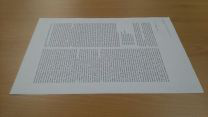

In [0]:
image

In [0]:
image_tensor = to_tensor(image)

In [0]:
image_tensors = image_tensor.unsqueeze(0).to(device)

In [0]:
from PIL import ImageDraw

In [0]:
draw_line = ImageDraw.Draw(image)

In [0]:
ANS_LT = [data['LTx'][test_index]*resize_ratio, data['LTy'][test_index]*resize_ratio]
ANS_RT = [data['RTx'][test_index]*resize_ratio, data['RTy'][test_index]*resize_ratio]
ANS_RB = [data['RBx'][test_index]*resize_ratio, data['RBy'][test_index]*resize_ratio]
ANS_LB = [data['LBx'][test_index]*resize_ratio, data['LBy'][test_index]*resize_ratio]

In [0]:
print(ANS_LT, ANS_RT, ANS_RB, ANS_LB)

[38.900000000000006, 18.05] [169.10000000000002, 17.1] [204.20000000000002, 93.05000000000001] [9.0, 94.7]


In [0]:
draw_line.point(ANS_LT, fill="Red" )
draw_line.point(ANS_RT, fill="Red" )
draw_line.point(ANS_RB, fill="Red" )
draw_line.point(ANS_LB, fill="Red" )

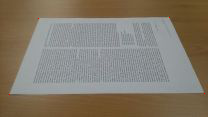

In [0]:
image

In [0]:
# do forward
result = model(image_tensors)

In [0]:
result = result.reshape(8)

In [0]:
PRE_LT = [result[0].item(), result[1].item()]
PRE_RT = [result[2].item(), result[3].item()]
PRE_RB = [result[4].item(), result[5].item()]
PRE_LB = [result[6].item(), result[7].item()]

In [0]:
print(PRE_LT, PRE_RT, PRE_RB, PRE_LB)

[38.780616760253906, 18.108171463012695] [169.02627563476562, 17.134565353393555] [204.00282287597656, 92.91919708251953] [8.994504928588867, 94.64319610595703]


In [0]:
draw_line.point(PRE_LT, fill="Yellow" )
draw_line.point(PRE_RT, fill="Yellow" )
draw_line.point(PRE_RB, fill="Yellow" )
draw_line.point(PRE_LB, fill="Yellow" )

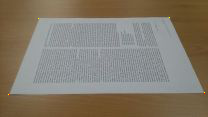

In [0]:
image

## Other Image

In [0]:
# image = default_loader(data_root+"07_RandomShoot/20150429_161538.jpg")
image = default_loader(data_root+"07_RandomShoot/20150429_161434.jpg")

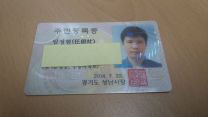

In [0]:
image

In [0]:
draw_line = ImageDraw.Draw(image)

In [0]:
# data_root+"07_RandomShoot/20150429_161434.jpg"
Answer = [754,	456, 3135,	413,	3458,	1846,	474,	1913]

# data_root+"07_RandomShoot/20150429_161538.jpg
# Answer = [934,	598,	3026,	569,	3273,	1609,	721,	1656]


ANS_LT = [ Answer[0]*resize_ratio, Answer[1]*resize_ratio ]
ANS_RT = [ Answer[2]*resize_ratio, Answer[3]*resize_ratio ]
ANS_RB = [ Answer[4]*resize_ratio, Answer[5]*resize_ratio ]
ANS_LB = [ Answer[6]*resize_ratio, Answer[7]*resize_ratio ]

In [0]:
print(ANS_LT, ANS_RT, ANS_RB, ANS_LB)

[37.7, 22.8] [156.75, 20.650000000000002] [172.9, 92.30000000000001] [23.700000000000003, 95.65]


In [0]:
draw_line.point(ANS_LT, fill="Red" )
draw_line.point(ANS_RT, fill="Red" )
draw_line.point(ANS_RB, fill="Red" )
draw_line.point(ANS_LB, fill="Red" )

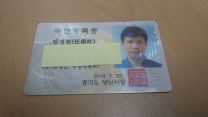

In [0]:
image

In [0]:
image_tensor = to_tensor(image)

In [0]:
image_tensors = image_tensor.unsqueeze(0).to(device)

In [0]:
# do forward
result = model(image_tensors)

In [0]:
result = result.reshape(8)

In [0]:
PRE_LT = [result[0].item(), result[1].item()]
PRE_RT = [result[2].item(), result[3].item()]
PRE_RB = [result[4].item(), result[5].item()]
PRE_LB = [result[6].item(), result[7].item()]

In [0]:
print(PRE_LT, PRE_RT, PRE_RB, PRE_LB)

[37.79604721069336, 13.183886528015137] [164.35345458984375, 20.255821228027344] [166.84228515625, 97.67449951171875] [25.857091903686523, 92.73535919189453]


In [0]:
draw_line.point(PRE_LT, fill="Yellow" )
draw_line.point(PRE_RT, fill="Yellow" )
draw_line.point(PRE_RB, fill="Yellow" )
draw_line.point(PRE_LB, fill="Yellow" )

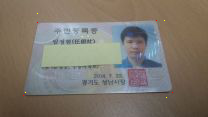

In [0]:
image

## 계획 관련

- 선정한 주제 :  운전면허증 인식
- 목표 : 나무색 배경의 [김민욱] 운전면허증 인식
- 중간발표일 : 2018-08-09
- 최종발표일 : 2018-08-30